<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**CONTESTO:** Rock o Hip-Hop? Applica metodi di machine learning per classificare i brani in generi musicali, senza doverli ascoltare :) 

**OBIETTIVO:** 

Utilizzando un set di dati composto da brani di due generi musicali (Hip-Hop e Rock), addestrerai un classificatore per distinguere tra i due generi in base solo alle informazioni sui brani derivate dai dati che hai a disposizione. Per prima cosa utilizzerai Pandas per analizzare i dati, aggregare informazioni e creare grafici con Seaborn o MatplotLib.

Successivamente, utilizzerai la libreria scikit-learn per prevedere se puoi classificare correttamente il genere di una canzone in base a caratteristiche come energia, acustica, tempo, ballabilità etc..


In [2]:
# Load paackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl 

In [8]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/Data Science/Materiale Corso/Workshop/4° workshop/Dati/dataset.csv")
metrics = pd.read_json("/content/drive/MyDrive/Data Science/Materiale Corso/Workshop/4° workshop/Dati/metrics.json")

In [4]:
# EDA 
data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [9]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [10]:
metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [24]:
genrs = data[["track_id", "genre_top"]]
genrs.head()

count = genrs["genre_top"].value_counts()
print(count)

Rock       14182
Hip-Hop     3552
Name: genre_top, dtype: int64


In [26]:
# Joint datasets 

data_joint=pd.merge(genrs, metrics, on="track_id")

print(data_joint.head())


   track_id genre_top  acousticness  danceability    energy  instrumentalness  \
0       153      Rock      0.988306      0.255661  0.979774          0.973006   
1       154      Rock      0.970135      0.352946  0.023852          0.957113   
2       155      Rock      0.981657      0.142249  0.912122          0.967294   
3       169      Rock      0.989141      0.225978  0.722835          0.263076   
4       170      Rock      0.886660      0.298518  0.744333          0.920950   

   liveness  speechiness   tempo   valence  
0  0.121342     0.051740  90.241  0.034018  
1  0.113261     0.032177  53.758  0.035632  
2  0.363510     0.087527  91.912  0.034325  
3  0.092371     0.053406  94.322  0.028347  
4  0.139587     0.088781  97.880  0.073548  


In [27]:
count2 = data_joint["genre_top"].value_counts()

print(count2)

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64


In [36]:
rock_df =data_joint[data_joint["genre_top"]=="Rock"]
hiphop_df =data_joint[data_joint["genre_top"]=="Hip-Hop"]

rock_sampled = rock_df.groupby("genre_top").apply(lambda x: x.sample(n=910, random_state=42)).reset_index(drop=True)
balanced_df = pd.concat([hiphop_df, rock_sampled], axis=0)


balanced_df.head()


,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
3892,2,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3893,3,Hip-Hop,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
3894,5,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3895,134,Hip-Hop,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
3896,583,Hip-Hop,0.748986,0.765886,0.513173,0.957209,0.614844,0.886914,180.025,0.401672


In [37]:
count3 = balanced_df["genre_top"].value_counts()

print(count3)


Hip-Hop    910
Rock       910
Name: genre_top, dtype: int64


In [38]:
# ML packages for KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



In [41]:
X = balanced_df.drop(["genre_top", "track_id"], axis=1)
y=balanced_df["genre_top"]


# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [43]:
# Evaluation
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Hip-Hop       0.78      0.75      0.76       181
        Rock       0.76      0.79      0.78       183

    accuracy                           0.77       364
   macro avg       0.77      0.77      0.77       364
weighted avg       0.77      0.77      0.77       364



In [44]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[135  46]
 [ 38 145]]


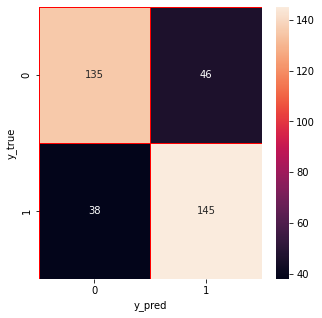

In [50]:
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5,
            linecolor="red",
            fmt=".0f",
            ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()